In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

### Doing computations in sympy

In [2]:
x,pi,tau = sp.symbols('x pi tau')
sp.init_printing(use_unicode=True)#printing option pf sympy

In [3]:
def lambda_fn_sym(t):
    p=np.pi
    lambda_0=0.1
    lambda_f=1.0
    return lambda_0 + (lambda_f-lambda_0)*sp.sin(pi/2*(sp.sin(t*pi/2.0/tau)**2))**2
lambda_fn_sym(x)

In [119]:
def dot_lambda_fn_sym(t):
    return sp.diff(lambda_fn_sym(t),t)
dot_lambda_fn_sym(x)

In [5]:
def mu(t):
    return 1./lambda_fn_sym(t)

def mu_dot(t):
    return sp.diff(mu(t),t)

def mu_ddot(t):
    return sp.diff(mu(t),t,2)

In [7]:
def lambda_cd(t):
    return (lambda_fn_sym(t)/sp.sqrt(1+ mu_dot(t)**2))*(1-mu(t)*mu_ddot(t)/(1+mu_dot(t)**2))
#lambda_cd(x)

In [190]:
###substituting value 
lambda_fn_sym_value=(lambda_fn_sym(x).subs({pi:np.pi, tau:1.0}))
lambda_cd_value=(lambda_cd(x).subs({pi:np.pi, tau:5.0,x:5*x})) ###this is tricky!lambda_cd has tau at two places
#on its own and with t/tau. So, here I plotted lambda_cd(t/tau) with tau=5 wherever it's on it's own.

### Importing functions from sympy to numpy

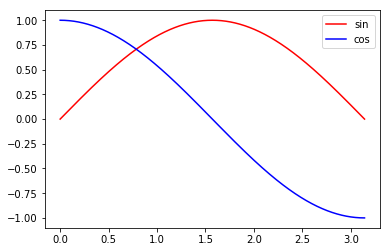

In [191]:
###An example
def sin_sym(t):
    return sp.sin(t)
def cos_sym(t):
    return sp.diff(sin_sym(t),t)

lam_x = sp.lambdify(x, sin_sym(x), modules=['numpy'])
lam_x1 = sp.lambdify(x, cos_sym(x), modules=['numpy'])

x_vals = np.linspace(0, np.pi, 1000)
y_vals = lam_x(x_vals)
y_vals1 = lam_x1(x_vals)

plt.plot(x_vals,y_vals,'r', label='sin')
plt.plot(x_vals,y_vals1,'b', label='cos')
plt.legend()

In [188]:
np_lambda = sp.lambdify(x, lambda_fn_sym_value, modules=['numpy'])
np_lambda_cd = sp.lambdify(x, lambda_cd_value, modules=['numpy'])
x_vals = np.linspace(0, 1, 1000)
y_vals_real_prot = np_lambda(x_vals)
y_vals_cd_prot = np_lambda_cd(x_vals)

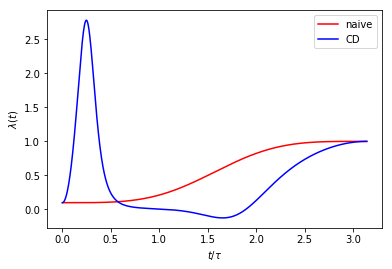

In [192]:
plt.plot(x_vals,y_vals_real_prot,'r', label='naive')
plt.plot(x_vals,y_vals_cd_prot,'b', label='CD')
plt.xlabel(r"$t/ \tau$")
plt.ylabel(r"$\lambda(t)$")
plt.legend()

=